<center>
    <img src="https://www.maclocks.com/media/logo/stores/4/maclocks.png" width="200" alt="logo"  />
        
</center>


<h1 align="center"><font size="5"> Part Recommender system - Machine learning with Python </font></h1>

### Objective 
### Content-Based recommendation system
Based on own history, advice the sales team which product & to which reseller to recommend.

### About dataset

This dataset is about past sales. The **sales.csv** data set includes details of 30,000 transactions with the different qty of sales. It includes following fields:

| Field             | Description                                                                           |
| --------------    | ------------------------------------------------------------------------------------- |
| Qty               | Qty of Items Sold                                                                     |
| Qty Rank          | Qty Rank of Items Sold                                                                |
| Sales             | Amount Sales                                                                          |
| SKU               | Item                                                                                  |
| Family - Priority | Item Group                                                                            |
| Family A          | Item Group                                                                            |
| Family B          | Item Group                                                                            |
| Family C          | Item Group                                                                            |
| Resellers         | Reseller                                                                              |
| Distributor       | Distributor                                                                           |
| Channel           | Channel                                                                               |
| Country           | Country                                                                               |
| Region            | Region                                                                                |                                                    
| Quarter           | Period                                                                                |
| Year              | Period                                                                                |



 
 <hr>
<a id="ref3"></a>

### Preliminary plan

Clusterize 
- Resellers by Qty, Channel, Region, Families
- SKUs by Qty, Families, Countries, Quarter

Build Recommendation Systems
- Recommend products from the same cluster
- Collaborative Filtering : Recommend products which were bought by other resellers


<hr>

<a id="ref2"></a>

# Preprocessing

In [1]:
# load required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a725b56cc1104f22ba91fc31bb4ccc4f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0ch3TOlTuyTpCA87FMueq6is2YhtRLypSfxabvJ7xAwl',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a725b56cc1104f22ba91fc31bb4ccc4f.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-3njyd76mwxst9c',Key='sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.tail()


,Channel detailed,Direct Customer,Year,Quarter,Distributor,Qty,Qty Rank,Sales,SKU,Resellers,Country,Region,Rep. Region,Family - Priority,Family A,Family B,Family C
29994,B2B,0,2019,4,Ingram Mexico,5,1,461.85,101W224SENW,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Space bundles - Apple devices,Display Solutions,Bundles,Apple
29995,B2B,0,2019,4,Ingram Mexico,7,1,332.99,HOVERTAB,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Hovertab,Display Solutions,Hovertab,Universal
29996,B2B,1,2020,1,TEKSERVE MEXICO SA DE CV,13,2,6096.56,WALLIPAD8B,Tekserve Mexico Sa De Cv,Mexico,LatAm,Efren,Storage & Charging Solutions,IT Hardware Security,Charging,Universal
29997,B2B,0,2019,3,Azlan,4,1,159.84,HOVERTAB,Tektraders Limited,UK,UK & Ireland,Niklas,Hovertab,Display Solutions,Hovertab,Universal
29998,07 Online Team,1,2020,1,tekxperience,7,1,505.45,IPADAIRBB,Tekxperience,US,USA,Don,iPad cases & Band,Display Solutions,IPADAIRBB,Apple


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


In [3]:
df['Region'].value_counts()

USA               12605
UK & Ireland       3308
DACH               2508
France             2378
Scandinavia        2373
Canada             1834
Benelux            1494
Australia & NZ     1160
Iberia              680
APAC                570
Italy               477
Eastern Europe      309
LatAm               197
Israel               33
Middle East          31
Caribbean            18
Name: Region, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a219dba20>]],
      dtype=object)

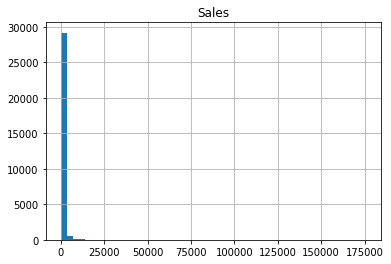

In [4]:
df.hist(column='Sales', bins=50)

<a id="ref2"></a>

# Preprocessing



#encoding https://datascience.stackexchange.com/questions/14069/mass-convert-categorical-columns-in-pandas-not-one-hot-encoding

char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])
    
df.head()

In [5]:
#Remove empty or NaN raws

nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(inplace=True)
df = df.reset_index()
del df['index']
df = df.reindex()
df.tail()

,Channel detailed,Direct Customer,Year,Quarter,Distributor,Qty,Qty Rank,Sales,SKU,Resellers,Country,Region,Rep. Region,Family - Priority,Family A,Family B,Family C
29773,B2B,0,2019,4,Ingram Mexico,5,1,461.85,101W224SENW,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Space bundles - Apple devices,Display Solutions,Bundles,Apple
29774,B2B,0,2019,4,Ingram Mexico,7,1,332.99,HOVERTAB,Tekserve Mexico S De Rl De Cv,Mexico,LatAm,Efren,Hovertab,Display Solutions,Hovertab,Universal
29775,B2B,1,2020,1,TEKSERVE MEXICO SA DE CV,13,2,6096.56,WALLIPAD8B,Tekserve Mexico Sa De Cv,Mexico,LatAm,Efren,Storage & Charging Solutions,IT Hardware Security,Charging,Universal
29776,B2B,0,2019,3,Azlan,4,1,159.84,HOVERTAB,Tektraders Limited,UK,UK & Ireland,Niklas,Hovertab,Display Solutions,Hovertab,Universal
29777,07 Online Team,1,2020,1,tekxperience,7,1,505.45,IPADAIRBB,Tekxperience,US,USA,Don,iPad cases & Band,Display Solutions,IPADAIRBB,Apple


In [92]:
SKU_Families = ['Family - Priority', 'Family A', 'Family B', 'Family C']

Recomended_SKU = pd.DataFrame(df[['SKU','Family - Priority', 'Family A', 'Family B', 'Family C']])
Recomended_SKU.drop_duplicates(keep='last',inplace=True)
Recomended_SKU = Recomended_SKU.reset_index()
Recomended_SKU.head()

,index,SKU,Family - Priority,Family A,Family B,Family C
0,157,680HSWW,Other enclosures,Display Solutions,Enclosures,Samsung
1,678,CV01B,POS,Display Solutions,Stand Mounts,Apple
2,679,CV05B,POS,Display Solutions,Enclosures,Apple
3,970,CL20T,EOL,IT Hardware Security,Cable Locks,Universal
4,1088,VRP-S,Add On & Accessories,Others,Others,Others


In [95]:
obj_df = Recomended_SKU.select_dtypes(include=['object']).copy()
SKU_df = Recomended_SKU['SKU']

In [96]:
from sklearn.preprocessing import LabelBinarizer

for i in SKU_Families:
    lb_style = LabelBinarizer()
    lb_results = lb_style.fit_transform(obj_df[i])
    SKU_df= pd.concat([SKU_df, pd.DataFrame(lb_results, columns=lb_style.classes_)], axis=1)
    
SKU_df.tail()

,SKU,Add On & Accessories,Amazon,AppleTV & MacMini & iMac,Arm's & Wall Mounts,Axis bundles,Axis enclosures,Basic Material for BOM,Cables,Cling bundles,...,Universal,Apple,Dell,Dragon,Microsoft,Others,Samsung,Universal,Verifone,Zebra
817,250VBBVBP01B,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
818,101W224SENW,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
819,WALLIPAD8B,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
820,HOVERTAB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
821,IPADAIRBB,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [97]:
SKU_df.columns[:20]

Index(['SKU', 'Add On & Accessories', 'Amazon', 'AppleTV & MacMini & iMac',
       'Arm's & Wall Mounts', 'Axis bundles', 'Axis enclosures',
       'Basic Material for BOM', 'Cables', 'Cling bundles', 'Clings',
       'Counter Stands', 'Customize', 'EOL', 'Ergonomics & Medical equipment',
       'Executive bundles', 'Floor Stands', 'Full Metal Enclosure bundles',
       'Hardware', 'Hovertab'],
      dtype='object')

In [98]:
rating_df =  df[['SKU','Resellers','Qty']].groupby(['Resellers','SKU']).sum().add_prefix("Rating_by_")
rating_df =  rating_df / rating_df.groupby(level=0).sum()
rating_df =  rating_df.reset_index()
rating_df.head(10)


,Resellers,SKU,Rating_by_Qty
0,"""Hamburg 4"" Edv-Systemberatung",BLD01KL,0.074627
1,"""Hamburg 4"" Edv-Systemberatung",MBPRLDGTB01,0.149254
2,"""Hamburg 4"" Edv-Systemberatung",MBPRLDGTB01KL,0.776119
3,0,680EGEB,1.000000
4,0Ffice It-Partner Ronneby,UCLGSTDW,1.000000
5,101 Biz Inc Dba 101 Shopper,MBALDG01,0.931034
6,101 Biz Inc Dba 101 Shopper,MBPRLDGTB01,0.068966
7,101 Biz Incdba 101 Shopper,BLD01CL,1.000000
8,18745,660REACH912SGEB,0.500000
9,18745,REACHWLLBRKT,0.500000


In [99]:
user_df = pd.merge(rating_df, SKU_df, on=['SKU','SKU'])
user_df.drop_duplicates(keep='last',inplace=True)
user_df.head()

,Resellers,SKU,Rating_by_Qty,Add On & Accessories,Amazon,AppleTV & MacMini & iMac,Arm's & Wall Mounts,Axis bundles,Axis enclosures,Basic Material for BOM,...,Universal,Apple,Dell,Dragon,Microsoft,Others,Samsung,Universal,Verifone,Zebra
0,"""Hamburg 4"" Edv-Systemberatung",BLD01KL,0.074627,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,ASM Technologies Ltd,BLD01KL,0.209622,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Academia Limited,BLD01KL,0.015152,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Accurate Technologies Ltd.,BLD01KL,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Activium Information Design,BLD01KL,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# lets look into 
### ASM Technologies Ltd 
user_df.iloc[[123],0]

In [100]:
user = 'Arktis.De Gmbh' #user_df.iloc[[12],0].item()
user 

'Arktis.De Gmbh'

In [101]:
userFamilyTable = user_df[user_df['Resellers']==user]
#Dropping unnecessary issues due to save memory and to avoid issues
#userFamilyTable = userFamilyTable.drop('Resellers', 1).drop('Rating_by_Qty', 1)
userFamilyTable

,Resellers,SKU,Rating_by_Qty,Add On & Accessories,Amazon,AppleTV & MacMini & iMac,Arm's & Wall Mounts,Axis bundles,Axis enclosures,Basic Material for BOM,...,Universal,Apple,Dell,Dragon,Microsoft,Others,Samsung,Universal,Verifone,Zebra
12,Arktis.De Gmbh,BLD01KL,0.033613,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2834,Arktis.De Gmbh,HOVERTAB,0.201681,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3334,Arktis.De Gmbh,CL15UTL,0.193277,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6327,Arktis.De Gmbh,AIO-B,0.008403,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6402,Arktis.De Gmbh,AIO-W,0.008403,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8473,Arktis.De Gmbh,UNVMBPRLDG01CL,0.050420,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10882,Arktis.De Gmbh,ATVEN35,0.193277,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11230,Arktis.De Gmbh,CL12UTHBB,0.277311,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
11681,Arktis.De Gmbh,189BGRPLCK,0.008403,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13936,Arktis.De Gmbh,260VBBVBP01B,0.008403,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [102]:
uft = userFamilyTable.drop('Resellers', 1).drop('Rating_by_Qty', 1).drop('SKU', 1)
ur = userFamilyTable[['Rating_by_Qty']]


In [103]:
#ir= user_df[user_df['Resellers']==user]
#ir = ir[['Rating_by_Qty']]*100
#ir
#Dot produt to get weights
userProfile = uft.transpose().dot((ur*100).astype(int))
#The user profile
userProfile

,Rating_by_Qty
Add On & Accessories,0
Amazon,0
AppleTV & MacMini & iMac,19
Arm's & Wall Mounts,0
Axis bundles,0
Axis enclosures,0
Basic Material for BOM,0
Cables,0
Cling bundles,0
Clings,0


In [107]:
FamilyTable = SKU_df.drop('SKU', 1)
recommendationTable_df = (FamilyTable.dot(userProfile['Rating_by_Qty']))/(userProfile['Rating_by_Qty'].sum())
#Sort our recommendations in descending order
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head(25)

385    0.508065
801    0.508065
282    0.508065
802    0.508065
764    0.508065
216    0.508065
590    0.508065
599    0.508065
729    0.508065
458    0.508065
611    0.508065
70     0.508065
463    0.508065
666    0.505376
366    0.505376
639    0.505376
772    0.491935
294    0.491935
291    0.491935
688    0.491935
799    0.491935
700    0.491935
746    0.435484
763    0.435484
118    0.435484
dtype: float64

In [105]:
#The final recommendation table
Recomended_SKU.loc[SKU_df.index.isin(recommendationTable_df.head(20).keys())]

,index,SKU,Family - Priority,Family A,Family B,Family C
70,8867,189BGRPLCKMT,Universal,Display Solutions,Universal,Universal
216,20858,199WSLDDCKW,Universal,Display Solutions,Universal,Universal
282,21947,189B,Universal,Display Solutions,Universal,Universal
291,22194,CL15WUTL,Universal,IT Hardware Security,Cable Locks,Universal
294,22448,CLLNV04T,Universal,IT Hardware Security,Cable Locks,Universal
366,25129,TBRPLTB,Universal,IT Hardware Security,Universal,Universal
385,25711,CL37UTHBB,Universal,Display Solutions,Universal,Universal
458,27252,199BSLDDCKB,Universal,Display Solutions,Universal,Universal
463,27343,CL12CUTHBB,Universal,Display Solutions,Universal,Universal
590,28924,CL12MPL,Universal,Display Solutions,Universal,Universal
